# WeatherPy
----

### Analysis
* There is an observable correlation between latitude and max temperature: the farther away a city is from the equator (0 latitude), the higher temperatures seem to be.
* There is no observable correlation between latitude and humidity.
* There is no observable correlation between latitude and windspeed.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import pprint
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Config info
url = "http://api.openweathermap.org/data/2.5/weather?"
city = cities[0]

# Build query URL
query_url = url + "appid=" + api_key + "&q=" + city + '&' + 'units=imperial'

# Get weather data and test response for single city
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
pprint(weather_json)
print('\n')

cloudiness = weather_json['clouds']['all']
country = weather_json['sys']['country']
date = weather_json['dt']
lat = weather_json['coord']['lat']
lng = weather_json['coord']['lon']
maxTemp = weather_json ['main']['temp_max']
windSpeed = weather_json['wind']['speed']
humidity = weather_json['main']['humidity']

print(cloudiness)
print(country)
print(date)
print(lat)
print(lng)
print(maxTemp)
print(windSpeed)
print(humidity)
# try
# except:
#     print('City not found. Skipping...')

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 50.6, 'lon': 97.53},
 'dt': 1561846378,
 'id': 1501377,
 'main': {'grnd_level': 826.36,
          'humidity': 72,
          'pressure': 1011.44,
          'sea_level': 1011.44,
          'temp': 46.71,
          'temp_max': 46.71,
          'temp_min': 46.71},
 'name': 'Kungurtug',
 'sys': {'country': 'RU',
         'message': 0.007,
         'sunrise': 1561843242,
         'sunset': 1561902351},
 'timezone': 25200,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 189.553, 'speed': 3.51}}


0
RU
1561846378
50.6
97.53
46.71
3.51
72


In [4]:
# Create a dataframe to hold values
city_weather = pd.DataFrame(cities, columns=['City'])
city_weather[['Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']]=pd.DataFrame([['','','','','','','','']], index=city_weather.index)

# Loop through city list to check for responses and assign values to dataframe
print('Beginning Data Retrieval')
print('---------------------------')
for index,row in city_weather.iterrows():
    city = row['City']
    try:
        # Build query URL
        query_url = url + "appid=" + api_key + "&q=" + city + '&' + 'units=imperial'
        
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        # get weather characteristics
        cloudiness = weather_json['clouds']['all']
        country = weather_json['sys']['country']
        date = weather_json['dt']
        lat = weather_json['coord']['lat']
        lng = weather_json['coord']['lon']
        maxTemp = weather_json ['main']['temp_max']
        windSpeed = weather_json['wind']['speed']
        humidity = weather_json['main']['humidity']
        
        # assign weather characteristics to data frame
        city_weather.loc[index,'Cloudiness'] = cloudiness
        city_weather.loc[index,'Country'] = country
        city_weather.loc[index,'Date'] = date
        city_weather.loc[index,'Humidity'] = humidity
        city_weather.loc[index,'Lat'] = lat
        city_weather.loc[index,'Lng'] = lng
        city_weather.loc[index,'Max Temp'] = maxTemp
        city_weather.loc[index,'Wind Speed'] = windSpeed

        print(f'Processing Record {index} of Set | {city}')
    except (KeyError, IndexError):
        print('City not found. Skipping...')

print('---------------------------')
print('Data Retrieval Complete')
print('---------------------------')

Beginning Data Retrieval
---------------------------
Processing Record 0 of Set | kungurtug
Processing Record 1 of Set | qaanaaq
Processing Record 2 of Set | tiksi
Processing Record 3 of Set | hermanus
Processing Record 4 of Set | owando
Processing Record 5 of Set | jamestown
Processing Record 6 of Set | ano mera
Processing Record 7 of Set | timmins
City not found. Skipping...
Processing Record 9 of Set | hobart
Processing Record 10 of Set | upernavik
Processing Record 11 of Set | new norfolk
Processing Record 12 of Set | albany
Processing Record 13 of Set | saskylakh
City not found. Skipping...
Processing Record 15 of Set | avarua
Processing Record 16 of Set | toba tek singh
City not found. Skipping...
Processing Record 18 of Set | atuona
Processing Record 19 of Set | plouzane
Processing Record 20 of Set | hithadhoo
Processing Record 21 of Set | bredasdorp
Processing Record 22 of Set | hasaki
Processing Record 23 of Set | presidencia roque saenz pena
Processing Record 24 of Set | buss

Processing Record 212 of Set | komsomolskiy
Processing Record 213 of Set | sao felix do xingu
Processing Record 214 of Set | balkanabat
City not found. Skipping...
Processing Record 216 of Set | ishinomaki
Processing Record 217 of Set | bati
Processing Record 218 of Set | leh
Processing Record 219 of Set | lorengau
Processing Record 220 of Set | tuktoyaktuk
Processing Record 221 of Set | davila
Processing Record 222 of Set | xenia
Processing Record 223 of Set | waingapu
Processing Record 224 of Set | longyearbyen
Processing Record 225 of Set | komadi
Processing Record 226 of Set | aykhal
Processing Record 227 of Set | guerrero negro
Processing Record 228 of Set | port pirie
Processing Record 229 of Set | chicama
Processing Record 230 of Set | sao joao da barra
City not found. Skipping...
Processing Record 232 of Set | gualaquiza
Processing Record 233 of Set | cabo san lucas
Processing Record 234 of Set | bambous virieux
Processing Record 235 of Set | begoro
City not found. Skipping...


Processing Record 422 of Set | launceston
Processing Record 423 of Set | kuusamo
Processing Record 424 of Set | rawson
Processing Record 425 of Set | ucluelet
Processing Record 426 of Set | xai-xai
Processing Record 427 of Set | verkhnyaya inta
Processing Record 428 of Set | kambia
Processing Record 429 of Set | kasiri
Processing Record 430 of Set | harrismith
Processing Record 431 of Set | mizdah
Processing Record 432 of Set | husavik
Processing Record 433 of Set | angoram
Processing Record 434 of Set | seymchan
Processing Record 435 of Set | petropavlovsk-kamchatskiy
Processing Record 436 of Set | riyadh
Processing Record 437 of Set | sur
Processing Record 438 of Set | dharchula
Processing Record 439 of Set | were ilu
City not found. Skipping...
Processing Record 441 of Set | ostrovnoy
Processing Record 442 of Set | shahjahanpur
Processing Record 443 of Set | marsa matruh
Processing Record 444 of Set | rio gallegos
Processing Record 445 of Set | ortakoy
Processing Record 446 of Set |

In [5]:
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kungurtug,0,RU,1561846378,72,50.6,97.53,46.71,3.51
1,qaanaaq,0,GL,1561846433,45,77.48,-69.36,50.92,3.13
2,tiksi,100,RU,1561846433,85,71.64,128.87,39.01,10.63
3,hermanus,100,ZA,1561846433,68,-34.42,19.24,57,1.01
4,owando,0,CG,1561846434,69,-0.49,15.91,77.38,1.05


### Convert Raw Data to DataFrame
* Export the city data into a .csv.

In [6]:
# Export city data into a csv
city_weather.to_csv(output_data_file)

In [7]:
# replace empty values with NaN
city_weather['Cloudiness'].replace('', np.nan, inplace=True)
# Remove rows with no data
city_weather = city_weather.dropna()

In [8]:
city_weather.count()

City          528
Cloudiness    528
Country       528
Date          528
Humidity      528
Lat           528
Lng           528
Max Temp      528
Wind Speed    528
dtype: int64

In [9]:
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kungurtug,0.0,RU,1561846378,72,50.6,97.53,46.71,3.51
1,qaanaaq,0.0,GL,1561846433,45,77.48,-69.36,50.92,3.13
2,tiksi,100.0,RU,1561846433,85,71.64,128.87,39.01,10.63
3,hermanus,100.0,ZA,1561846433,68,-34.42,19.24,57,1.01
4,owando,0.0,CG,1561846434,69,-0.49,15.91,77.38,1.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [10]:
# Get Current Date Stamp
from datetime import datetime
currentDate = datetime.now().date().strftime('%m/%d/%y')

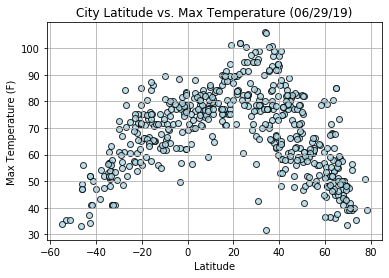

In [11]:
plt.scatter(city_weather.Lat,city_weather['Max Temp'],edgecolors='black',alpha=0.8, color = 'lightblue')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({currentDate})')
# Save and show plot
plt.savefig('Images/City Latitude vs. Max Temperature.png')
plt.show()

#### Latitude vs. Humidity Plot

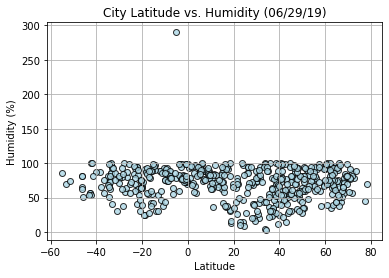

In [12]:
plt.scatter(city_weather.Lat,city_weather.Humidity,edgecolors='black',alpha=0.8, color = 'lightblue')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({currentDate})')
# Save and show plot
plt.savefig('Images/City Latitude vs. Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

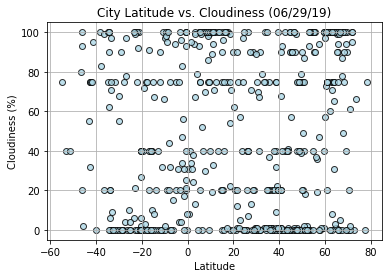

In [13]:
plt.scatter(city_weather.Lat,city_weather.Cloudiness,edgecolors='black',alpha=0.8, color = 'lightblue')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({currentDate})')
# Save and show plot
plt.savefig('Images/City Latitude vs. Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

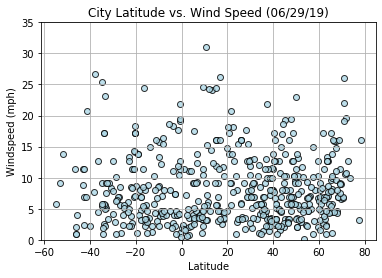

In [14]:
plt.scatter(city_weather.Lat,city_weather['Wind Speed'],edgecolors='black',alpha=0.8, color = 'lightblue')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.ylim(0,35)
plt.title(f'City Latitude vs. Wind Speed ({currentDate})')
# Save and show plot
plt.savefig('Images/City Latitude vs. Wind Speed.png')
plt.show()